<div style="border:solid Chocolate 2px; padding: 40px">

<b> Андрей, привет!👋</b>

Меня зовут Алексей Гриб, и я буду ревьюером твоего проекта. 

Сразу хочу предложить в дальнейшем общаться на "ты" - надеюсь, так будет комфортнее:) Но если это неудобно, обязательно дай знать, и мы придумаем что-нибудь ещё!
    
Цель ревью - не искать ошибки в твоём проекте, а помочь тебе сделать твою работу ещё лучше, устранив недочёты и приблизив её к реальным задачам специалиста по работе с данными. Поэтому не расстраивайся, если что-то не получилось с первого раза - это нормально, и это поможет тебе вырасти!
    
Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> похвала, рекомендации «со звёздочкой», полезные лайфхаки, которые сделают и без того красивое решение ещё более элегантным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> некритичные ошибки или развивающие рекомендации на будущее. 
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
критичные ошибки, которые обязательно нужно исправить.
</div>

    
Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 
    
Ты также можешь задавать свои вопросы, реагировать на мои комментарии, делать пометки и пояснения - полная творческая свобода! Но маленькая просьба - пускай они будут отличаться от моих комментариев, это поможет избежать путаницы в нашем общении:)
Например, вот так:
    
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*твой текст*
</div>
    
Давай посмотрим на твой проект!

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Привет,Алексей! Спасибо за быструю проверку и полезные советы! Постарался учесть все замичания.

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

Описание данных

Данные находятся в файле /datasets/autos.csv.
Признаки

- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- Repaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя

Целевой признак

- Price — цена (евро)

# План работы.

Работа устроена следующим образом:
- В первой главе загружаем данные 
- Во второй главе проводим предобработку.
- В 3 главе проводим анализ данных.Строим гистограммы для всех значимых признаков. 
- 4 глава. Смотрим корреляции и диаграммы рассеянья.
- Глава 5 готовим данные для обучения моделей
- Глава 6 обучение моделей.
- В 7 главе выбираем лучшую модель по точности скоросли обучения и предсказания.
- В последней главе делаем общие выводы по результатам работы.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Хорошее вступление!
    
В нём есть всё, что необходимо, чтобы понять суть проекта с первых строк отчёта!

## Загрузка данных

### Загрузка библиотек

In [1]:
!pip install phik -q
!pip install shap -q
!pip install scikit-learn==1.4.2 -q
!pip install matplotlib==3.5.3 -q
!pip install lightgbm -q

In [2]:
import pandas as pd

from scipy.stats import shapiro
import scipy.stats as stats
import matplotlib.pyplot as plt
import phik
import os
import seaborn as sns

from sklearn.model_selection import train_test_split

# загружаем класс pipeline
from sklearn.pipeline import Pipeline

# загружаем классы для подготовки данных
from sklearn.preprocessing import (
    OneHotEncoder, 
    StandardScaler, 
    MinMaxScaler, 
    RobustScaler
)   
from sklearn.compose import ColumnTransformer

# загружаем функцию для работы с метриками
from sklearn.metrics import mean_squared_error

# импортируем класс RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# загружаем нужные модели
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from lightgbm import LGBMRegress

# Константы

RANDOM_STATE = 42

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Библиотеки импортировали - отлично!

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>
Ты импортируешь библиотеки и модули, которые не используешь в проекте - так делать не стоит, так как ты забиваешь окружение лишними  инструментами.
    
В блоке импорта стоит оставить только то, что реально используется в проекте.
</div>

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Поправил* . А есть ли какойто способ узнать какие из библиотек не используются?

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В Юпитере - нет, только глазами или через `Ctrl+F`. В IDE типа `PyCharm` они подсвечиваются, когда не задействованы:)

### Загрузка данных

In [3]:
if os.path.exists('/datasets/autos.csv'):
    df = pd.read_csv('/datasets/autos.csv',parse_dates=['DateCrawled','DateCreated','LastSeen'])
else:
    print('Something is wrong')
    
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354369 non-null  datetime64[ns]
 1   Price              354369 non-null  int64         
 2   VehicleType        316879 non-null  object        
 3   RegistrationYear   354369 non-null  int64         
 4   Gearbox            334536 non-null  object        
 5   Power              354369 non-null  int64         
 6   Model              334664 non-null  object        
 7   Kilometer          354369 non-null  int64         
 8   RegistrationMonth  354369 non-null  int64         
 9   FuelType           321474 non-null  object        
 10  Brand              354369 non-null  object        
 11  Repaired           283215 non-null  object        
 12  DateCreated        354369 non-null  datetime64[ns]
 13  NumberOfPictures   354369 non-null  int64   

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Данные загрузили. Круто, что используешь `os` для управления путями файлов. 
    
Ещё на этапе считывания данных можно спарсить дату: за это действие отвечает параметр `parse_dates` метода `read_csv()`, в него нужно передать список с названием полей-дат, и в большинстве случаев дата будет корректно преобразована в нужный формат сразу:)

In [4]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Метод `.print()` не очень подходит для работы с таблицами типа `pd.DataFrame`, так как выводит их на экран просто как отформатированный текст. Для отображения небольших таблиц можно воспользоваться методом `.head()`, для таблиц побольше - модулем `display`.
        
</div>

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Поправил* .

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [5]:
df_initial_size = df.shape[0]
df_initial_size

354369

### Вывод 

Данные загружены и соответствуют описанию.

## Предобработка

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Даты приведены к нужному типу.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Удалил т.к. даты спарсил при чтении csv.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Окей, принято:)

### Дубликаты.

Посмотрим есть ли дубликаты и удалим их.

In [6]:
df.drop('DateCrawled',axis=1).duplicated().sum()

89

In [7]:
df = df.loc[~(df.drop('DateCrawled',axis=1).duplicated())]

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Найдены и удалены явные дубликаты.

### Категорийные признаки

Посмотрим нет ли опечаток или неявных дубликатов.

In [8]:
df_cat_columns = ['VehicleType','Gearbox','Model','FuelType','Brand','Repaired']
for i in df_cat_columns:
    print(df[i].unique())

[nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']
['manual' 'auto' nan]
['golf' nan 'grand' 'fabia' '3er' '2_reihe' 'other' 'c_max' '3_reihe'
 'passat' 'navara' 'ka' 'polo' 'twingo' 'a_klasse' 'scirocco' '5er'
 'meriva' 'arosa' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio'
 'kadett' 'kangoo' 'corsa' 'one' 'fortwo' '1er' 'b_klasse' 'signum'
 'astra' 'a8' 'jetta' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter' '156'
 'escort' 'forester' 'xc_reihe' 'scenic' 'a4' 'a1' 'insignia' 'combo'
 'focus' 'tt' 'a6' 'jazz' 'omega' 'slk' '7er' '80' '147' '100' 'z_reihe'
 'sportage' 'sorento' 'v40' 'ibiza' 'mustang' 'eos' 'touran' 'getz' 'a3'
 'almera' 'megane' 'lupo' 'r19' 'zafira' 'caddy' 'mondeo' 'cordoba' 'colt'
 'impreza' 'vectra' 'berlingo' 'tiguan' 'i_reihe' 'espace' 'sharan'
 '6_reihe' 'panda' 'up' 'seicento' 'ceed' '5_reihe' 'yeti' 'octavia' 'mii'
 'rx_reihe' '6er' 'modus' 'fox' 'matiz' 'beetle' 'c1' 'rio' 'touareg'
 'logan' 'spider' 'cuore' 's_max' 'a2' 'galaxy' 'c3

Как известно 'petrol' 'gasoline' это одно и тоже . 'petrol' пользутся в GB , 'gasoline' в С.Америке

In [9]:
df.loc[df['FuelType']=='gasoline','FuelType']='petrol'
df['FuelType'].unique()

array(['petrol', nan, 'lpg', 'other', 'hybrid', 'cng', 'electric'],
      dtype=object)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Молодец, что обработал этот дубликат.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 
        
Обрати внимание на ряд других неявных дубликатов:
        
1. `Model` - значения `rangerover` и `range_rover` аналогично характеризуют одну модель, можно также привести к одной форме.
        
2. `Brand` - значения `rover` и `land_rover` аналогично описывают одно и то же.

In [10]:
df.loc[df['Model']=='rangerover','Model']='range_rover'

Про rover я не уверен судя по вики это другой бренд, который перестал существовать в 2005. Но поскольку их мало , то ничего не потеряем обьединив их. 

In [11]:
df.loc[df['Brand']=='rover','Brand']='land_rover'

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
    
Поправил

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

### Аномалии

Посмотрим возможные аномалии.

In [12]:
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354280.000000,354280.000000,354280.000000,354280.000000,354280.000000,354280.0,354280.00000
mean,4416.458541,2004.234859,110.090256,128211.090098,5.714466,0.0,50507.16691
std,4514.138905,90.239242,189.872001,37906.417793,3.726473,0.0,25783.62594
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.00000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49406.00000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.00000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


Отбросим данные со странной датой регистрации. В таблице не может быть объявлений опубликованых раньше даты регистрации.

In [13]:
df.loc[(df['RegistrationYear']>df['DateCrawled'].dt.year)|(df['RegistrationYear']<1970),'Price'].count()

15868

In [14]:
df = df.loc[(df['RegistrationYear']<=df['DateCrawled'].dt.year)&(df['RegistrationYear']>=1970)]

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
По нижней границе фильтрация корректна.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

По верхней границе год регистрации нужно синхронизировать с датой выгрузки данных из базы: в таблице не может быть объявлений моложе даты выгрузки, иначе это были бы просто данные из будущего.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
    
Поправил

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

Отбросим данные со странной ценой. Которая явно не рыночная.

In [15]:
df.loc[(df['Price']<=500),'Price'].count()

39727

In [16]:
df = df.loc[(df['Price']>500)]

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Удалили околонулевые значения цен.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Может быть полезно также удалить неадекватно низкие значения цен: в пределах цен до 500-1000 евро вряд ли можно купить полноценный автомобиль.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
    
Хорошо увеличил нижнюю границу. Подержаные машины вполне могут стоить  500-1000 евро. Снашими пошлинами это конечно кажется фантастикой)

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Да, что-то из ряда вон:)

Отбросим данные со странной мощностью. Суперкаров судя по моделям в таблице нет. соответственно и мощность должна быть не выше 800 л.с. 

In [17]:
df.loc[(df['Power']>800)|(df['Power']<10),'Price'].count()

24603

In [18]:
df = df.loc[(df['Power']<800)&(df['Power']>10)]

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Удалили аномалии по верхней границе мощности.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Обязательно нужно удалить нулевые значения.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Может быть полезно также удалить околонулевые значения мощности - некоторые значения этого признака в таблице напоминают, скорее, телегу с конём, чем автомобиль:)

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
    
Поправил.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

Удаляем признак NumberOfPictures т.к. он везде равен 0.

In [19]:
df.loc[~(df['NumberOfPictures']==0),'Price'].count()

0

In [20]:
df = df.drop('NumberOfPictures', axis=1)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> Верно, признак бесполезен для моделирования.

### Пропуски.

In [21]:
df.isna().sum()

DateCrawled              0
Price                    0
VehicleType           8096
RegistrationYear         0
Gearbox               4360
Power                    0
Model                 9189
Kilometer                0
RegistrationMonth        0
FuelType             12248
Brand                    0
Repaired             35653
DateCreated              0
PostalCode               0
LastSeen                 0
dtype: int64

В случае с FuelType логично заполнить petrol как самый популярный вариант с большим отрывом.

In [22]:
df['FuelType'] = df['FuelType'].fillna('unknown')

Так же поступим и с Repaired,Gearbox,VehicleType. (Хотя данных у нас много, если результат будет не приемлемый ,то можно будет попробовать удалить пропуски.)

In [23]:
df['Repaired'] = df['Repaired'].fillna('unknown')
df['Gearbox'] = df['Gearbox'].fillna('unknown')
df['VehicleType'] = df['VehicleType'].fillna('unknown')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Пропуски обработаны - отлично!

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

В целом любая импутация пропусков сопряжена с риском внесения в модель ошибок, а удаление - с потерей обучающих примеров. При этом в случае удаления мы теряем часть бизнес-сценариев, так как ситуации, когда клиент не указывает какие-то параметры автомобиля - нередкость, и в идеале модель должна уметь обрабатывать и их.
        
При работе с категориальными признаками стоит использовать заглушки в виде новых значений категорий для заполнения пропусков: это позволит как сохранить наблюдения вместо их удаления, так и избавит нас от возможных ошибок при эмпирическом импутировании.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
    
Спасибо. Попробуем с заглушками. 

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

### Вывод

Выполнили педобработку: удалили дубликаты, аномалии и пропуски. Mожно переходить к анализу. Доля оставшихся данных:

In [24]:
df.shape[0]/df_initial_size

0.773411331126594

## Исследовательский анализ

### Информативные столбцы.

Цена зависит от свойств сомой машины и спроса. Таким образом DateCrawled и LastSeen как и RegistrationMonth не должны оказывать влияние на цену.
DateCreated возможно имеет влияние на цену. Но новые данные будут лежать вне уже существующего диапазона по этому эту хависимость так же не будем учитывать.  

In [25]:
print(df['DateCreated'].min(), df['DateCreated'].max())

2015-03-20 00:00:00 2016-04-07 00:00:00


Моделей автомобилей много они появляются новые, исчезают старые, выходят новые версии и т.д. таким образом будем учитывать только бренд который имеет гораздо большую стабильность. 

PostalCode содержит в себе зашифорванную информацию о положении в стране, но страны в данных нет по этому так же не будем принимать в расчет эту информацию. 

In [26]:
print(df['PostalCode'].min(), df['PostalCode'].max())

1067 99998


Для более читаемого вида перейдем от километров в тысячам км.

In [27]:
df['Kilometer'] = (df['Kilometer']/1000).astype(int)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Согласен, так удобнее:)

In [28]:
df = df.drop(['DateCreated','DateCrawled','LastSeen','RegistrationMonth','PostalCode'],axis=1)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Удалены лишние признаки.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Признак `Model` интуитивно кажется очень важными для моделирования, поэтому его удаление нужно хорошо аргументировать.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Кроме того что написал выше могу добавить , что 
- Модель и бренд не независимые поля и нижно оставлять только одно из них.
- Если пытаться разбить данные на выборки со всеми моделями, то часть не попадет в обучающую либо в тестовую. 
- В результате обучения нужная точность достигнута и без этого признака.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Давай пройдёмся по аргументам:
    
1. Скоррелированность этих признаков может влиять только на линейную модель, а у тебя также исследуется бустинг - для этой модели данный признак может быть важен. Хорошим решением было бы посмотреть на корреляцию модели и цены - уверен, она будет высокой.
    
2. Для того, чтобы корректно обрабатывать такие случаи, мы настраиваем энкодеры на бесперебойную работу - это не приведёт нас к ошибкам.
    
3. Пусть трешхолд и был достигнут, но это хорошая возможность для повышения качества модели. Достижение `RMSE=2499` не говорит о том, что модель можно давать в прод - заказчик явно спросит, что можно сделать для улучшения качества.
    
Соглашусь, что вопрос дискусионный - если мои аргументы не найдут в тебе отклик, предлагаю проверить на кросс-валидации модель с этим признаком и без, чтобы поставить в этом вопросе аргументированную точку:)

<div class="alert alert-info">
<h2> Комментарий студента V.2 <a class="tocSkip"> </h2>

Попробовал оставить модель и сравнить. 1740 без признака модели и 1695 с признаком. Действительно стало лучше.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Отлично!

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> В целом довольно избыточно создавать `Kkilometr` и удалять `Kilometer` - можно было бы просто изменить исходынй признак.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
    
Поправил.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Учтено.

In [29]:
dis = df.select_dtypes(include=['int']).columns.tolist()
dis

['Price', 'RegistrationYear', 'Power', 'Kilometer']

In [30]:
cat = df.select_dtypes(exclude=['int']).columns.tolist()
cat

['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']

### Гистограммы

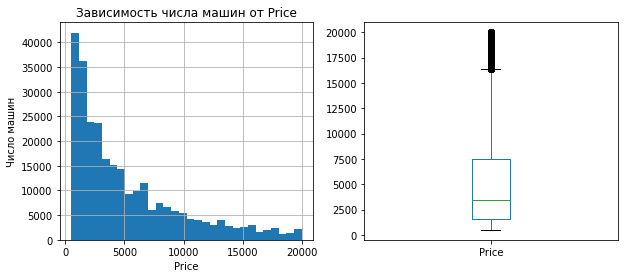

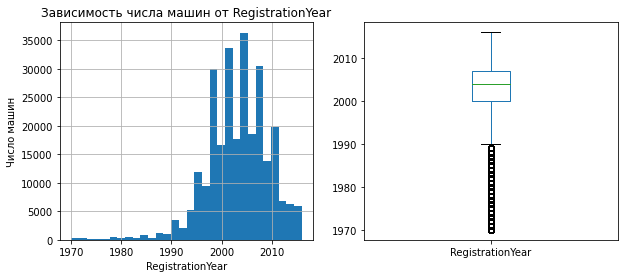

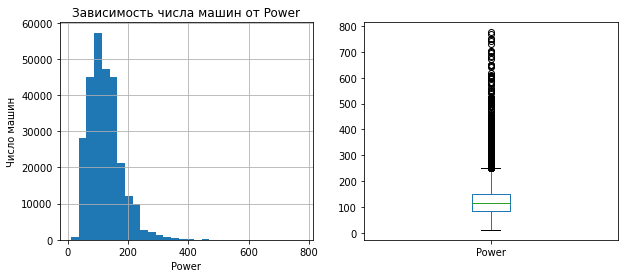

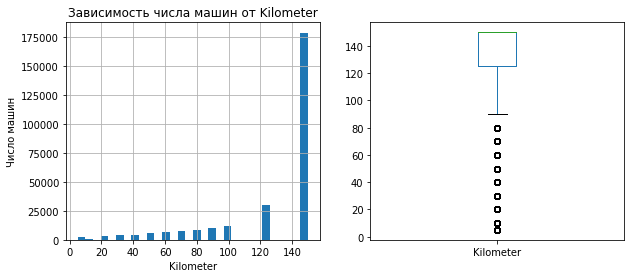

In [31]:
for i in dis:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    df[i].hist(bins=30)
    plt.title(f'Зависимость числа машин от {i}')
    plt.xlabel(i)
    plt.ylabel('Число машин')
    
    plt.subplot(1,2,2)
    df[i].plot(kind='box')
    plt.title('')
    plt.ylabel('')
    
    
    plt.show()

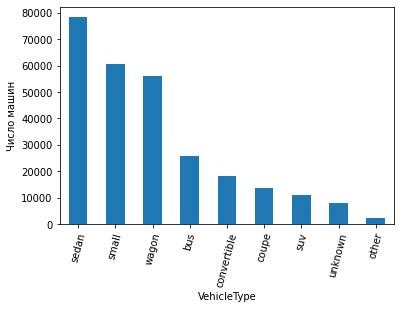

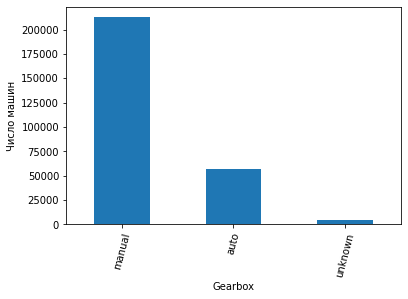

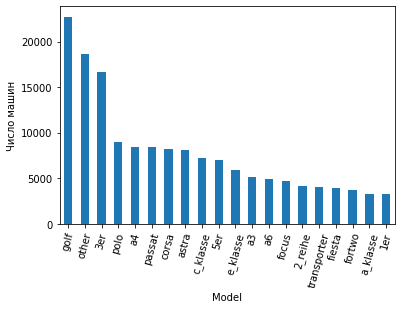

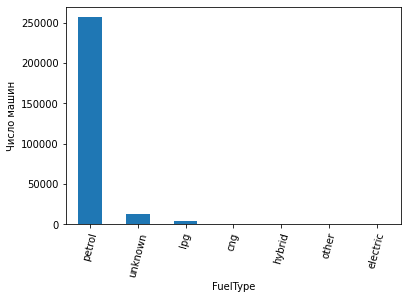

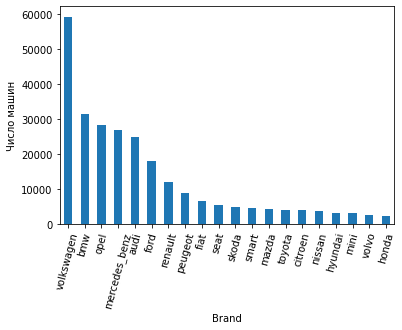

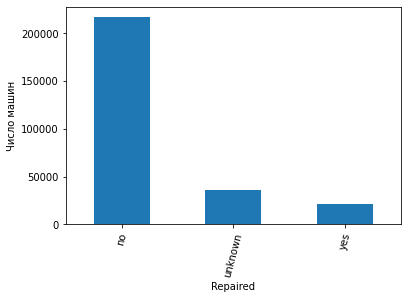

In [32]:
for i in cat:
    df.pivot_table(index=i,values='Price',aggfunc='count')\
    .sort_values(by='Price',ascending=False).head(20)\
    .plot(kind='bar',rot='75',legend=False)
    plt.xlabel(i)
    plt.ylabel('Число машин')
    plt.show()

In [33]:
df.loc[~(df['FuelType']=='petrol'),'FuelType'].count()

17585

### Вывод

Данные распределены не нормально есть выбросы. В категорийных признаках есть дисбаланс классов. В случае FuelType видно сильный дисбаланс классов.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> EDA признаков есть - отлично!

## Корреляционный анализ

Поскольку распределение признаков не является нормальным, для поиска корреляций будем использовать кореляции Спирмана и $\phi_k$. Так же нарисуем матрицы рассеянья.

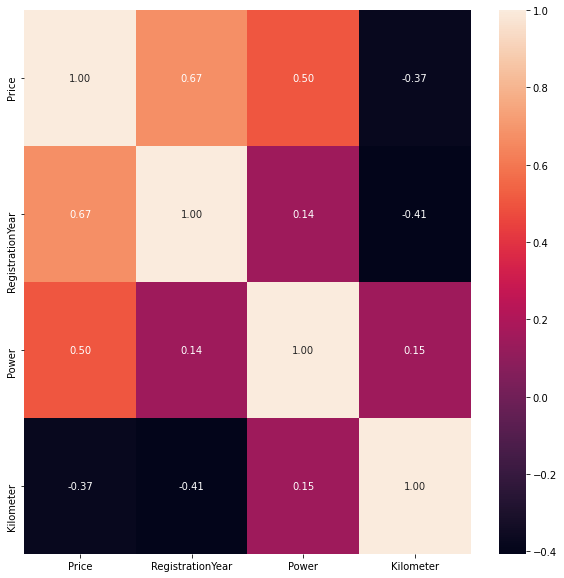

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method='spearman'),annot=True, fmt='.2f')
plt.show()

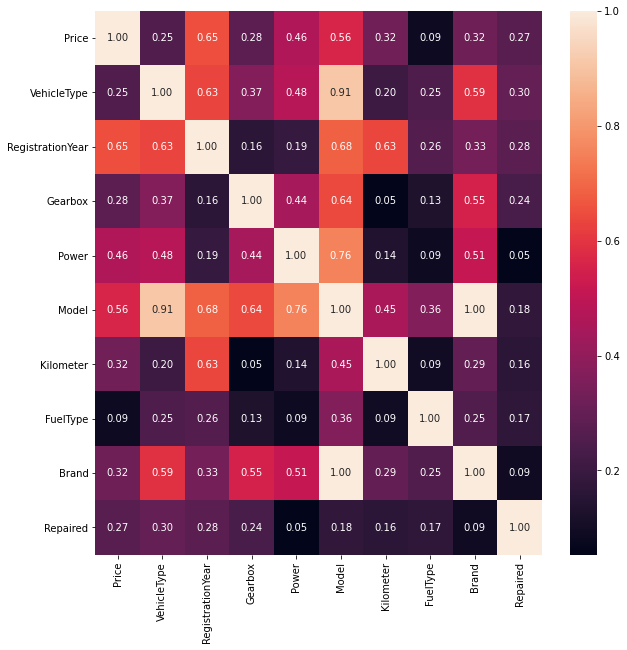

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(df.phik_matrix(interval_cols=['Price','Power']),annot=True, fmt='.2f')
plt.show()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Есть анализ корреляции - молодец, что используешь `phik` для анализа и нелинейных зависимостей, а также настраиваешь `interval_cols` для корректной оценки корреляции для переменных разного типа.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
    
`RegistrationYear` - дискретный признак, его не нужно передавать в `interval_cols`.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
    
Поправил.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Учтено.

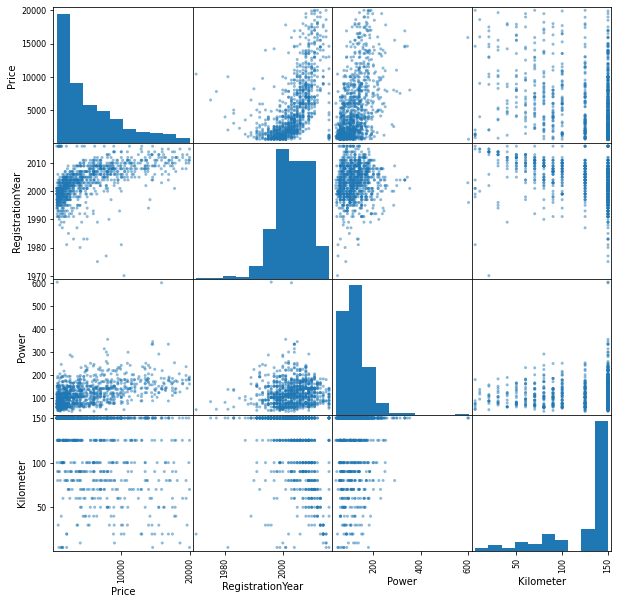

In [36]:
pd.plotting.scatter_matrix(df.sample(1000),figsize=(10,10))
plt.show()

### Вывод 

Из матрицы $\phi_k$ видно что зависимость целевого признака от FuelType слабая. Попробуем исключить этот признак из рассмотрения. С остальными признаками зависимость целевого есть , хотя например с RegistrationYear она не линейная.

In [37]:
df = df.drop('FuelType',axis=1)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Окей, тут удаление аргументировано!

## Подготовка данных

Разобьем выборки на обучающую и тестовую. Для ускорения обучения для обучения оставим малую часть.

In [38]:
# Создадим явно списки численных и категорийных величин. 
num = ['Power', 'Kilometer','RegistrationYear']
cat = ['VehicleType','Gearbox','Brand','Repaired','Model']

for i in cat:
    df[i] = df[i].astype('category')


X = df[num+cat]
y = df['Price']

TEST_SIZE = 0.25

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE)

X_train.shape, y_train.shape

((205554, 8), (205554,))

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Возможно, тут перепутаны параметры или переменные, но оставлять 10% на обучение и 90% на тестирование - очень плохое решение, модель точно недообучится.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
    
Не перепутано. Особого улучшения метрик при уменьшении соотношения не происходит, но сильно растет время обучения. Могу поставить стандартные 0.25 но тогда результатов не увижу. При 0.8 считает пол часа .Если считать дольше, то велик шанс словить отвалившийся Jupyter.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Понимаю, есть ресурсные ограничения. Особенно явно из-за `OneHotEncoder`. Могу порекомендовать несколько решений:
    
1. Использовать разреженную матрицу при кодировании `OneHot` за счёт параметра `sparse_output=True`.
2. Удалить лишние переменные перед обучением модели.
3. Запустить текущий код без изменений в более производительной среде типа `Google Colab`. 
    
Обучение только на 20% датасета - это явная, пусть и вынужденная ошибка, которая может приводить к плохому обучению модели.

<div class="alert alert-info">
<h2> Комментарий студента V.2 <a class="tocSkip"> </h2>

Действительно Google Colab справился справился. 

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [39]:
# создаём пайплайн для подготовки признаков из списка cat: OHE-кодирование
ohe_pipe = Pipeline(
    [
        (
            'ohe', 
            OneHotEncoder(drop='first',handle_unknown='ignore', sparse_output=True)
        )
    ]
)

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>

Для древесных и бустинговых моделей не стоит использовать `OneHotEncoder()`: эта техника кодирования увеличивает количество признаков, в результате чего модели сложнее создавать разделяющие правила, поэтому время работы и расчётные характеристики моделей сильно страдают на больших наборах данных. Вместо этого нужно использовать `OrdinalEncoder()` - эта техника кодирует категориальные признаки так, что с ними удобнее работать в ходе создания разделяющих правил. 
    
Для бустинговых алгоритмов альетрнатинва - использование внутренних кодировщиков, которые работают лучше сторонних. В случае `CatBoost` за это отвечает параметр `cat_features`. В случае `LightGBM` можно привести эти категориальные признаки к типу `category`, тогда модель будет работать с категориальными признаками автоматически.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Спасибо! Поправил с учетом рекомендации.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Тогда тебе нужно рассматривать бустинг вне `Pipeline` - в противном случае данные для него также кодируются с помощью `OneHotEncoder`.

<div class="alert alert-info">
<h2> Комментарий студента V.2 <a class="tocSkip"> </h2>

Я второй пайплайн создал, без ohe.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> `OneHotEncoder` нужно настроить так, чтобы он обрабатывал новые значения признаков, а не выбрасывал ошибку - при текущей настройке `handle_unknown` в случае возникновения новых значений у признаков, которых не было в `train`, модель будет падать, а для многих случаев важна бесперебойность решений.
    
Может понадобиться обновление библиотеки `sklearn`, так как в ранних версиях параметры `handle_unknown` и `drop` конфликтовали друг с другом, но в актуальной версии библиотеки такой проблемы нет.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
    
Поправил. Действительно вылетала ошибка.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Учтено.

In [40]:
# создаём пайплайн для подготовки данных 
# LinearRegression() KNeighborsRegressor() DummyRegressor()
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, cat),
        ('num', RobustScaler(), num)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final= Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', LinearRegression())
    ]
)

In [41]:
# создаём пайплайн для подготовки данных gb
data_preprocessor_gb = ColumnTransformer(
    [
        ('num', RobustScaler(), num)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_gb= Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', LGBMRegressor(random_state=RANDOM_STATE))
    ]
)

In [42]:
param_grid_1 = [
    
    # словарь для модели KNeighborsRegressor()
    {
        'models': [KNeighborsRegressor()],
        'preprocessor__num': [RobustScaler(), 'passthrough'],
        'models__n_neighbors': range(40,45)
    },
    
    # словарь для модели LinearRegression()
    {
        'models': [LinearRegression()],
        'preprocessor__num': [RobustScaler()] 
    },
    
    # словарь для модели DummyRegressor()
    {
        'models': [DummyRegressor()],
        'preprocessor__num': [RobustScaler()] 
    }
    
]

param_grid_2 = [
    # словарь для модели LGBMRegressor()
    {
        'models': [LGBMRegressor(random_state=RANDOM_STATE)],
        'models__num_leaves': range(17,20),
        'models__max_depth': range(6,8), 
        'models__learning_rate': [0.15,0.2],
        'preprocessor__num': [StandardScaler(),RobustScaler()] 
    }
]

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> У `LGBMRegressor` не настроен `random_state`.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
    
Поправил.
    

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Учтено.

## Обучение моделей

Обучаем модели и выбираем лучшие гиперпараметры с помощью RandomizedSearchCV.

In [43]:
def rscv(pipe_final,param_grid, n_iter):
    randomized_search = RandomizedSearchCV(
        pipe_final, 
        param_grid, 
        cv=5,
        n_iter=n_iter,
        scoring='neg_root_mean_squared_error',
        random_state=RANDOM_STATE,
        n_jobs=-1
    )


    randomized_search.fit(X_train, y_train)
    print ('Метрика лучшей модели при кросс-валидации:', -randomized_search.best_score_)
    return randomized_search

In [ ]:
%%time
other = rscv(pipe_final,param_grid_1,12)
other.best_estimator_

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories

In [ ]:
%%time
lgb = rscv(pipe_gb,param_grid_2,10)
lgb.best_estimator_

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
    
Если это возможно , подскажи как все модели засунуть в 1 пайплайн и один словарь param_grid. Не пойму как сделать чтобы для одних моделей ohe_pipe применялся , а для градиентного бустинга не применялся.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Быстро на этот вопрос ответить не могу - к сожалению, для работы с незакодированными категориями они должны быть в формате `category`, а после процессора формат данных, как и название признаков, меняются. Попробую поискать что-то к следующей итерации.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Не нашёл всё-таки таких решений - всё портит `ColumnTransformer`.

## Анализ моделей

### Время работы.

Составим таблицу со средним временем обучения, предсказания и RMSE на кросс-валидации.

In [ ]:
result = pd.DataFrame(other.cv_results_)
best = pd.DataFrame()
for i in ['KNeighborsRegressor()','DummyRegressor()','LinearRegression()']:
    best_score = result.loc[result['param_models'].astype('str')==i,'mean_test_score'].max()
    best = best.append(result.loc[(result['param_models'].astype('str')==i)\
                      &(result['mean_test_score']==best_score),\
                      ['param_models','mean_test_score','mean_fit_time','mean_score_time']],\
                       ignore_index=True)

In [ ]:
result = pd.DataFrame(lgb.cv_results_)

best_score = result['mean_test_score'].max()
best = best.append(result.loc[result['mean_test_score']==best_score,\
                      ['param_models','mean_test_score','mean_fit_time','mean_score_time']],\
                       ignore_index=True)
best['mean_test_score'] = - best['mean_test_score']
best.sort_values(by='mean_test_score')

### Лучшая модель.

Воспользовавшись таблицей выше выбираем оптимальной моделью LGBMRegressor. Посмотрим на метрику RMSE на тестовой выборке.

In [ ]:
%time y_test_pred_proba = lgb.best_estimator_.predict(X_test)
print(f'Метрика RMSE на тестовой выборке LGBMRegressor: {(mean_squared_error(y_test, y_test_pred_proba))**0.5}')


Сравним этот результат с DummyRegressor()

In [ ]:
dummy = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DummyRegressor())
    ]
)

dummy.fit(X_train,y_train)
y_test_pred_dummy = dummy.predict(X_test)
print(f'Метрика RMSE на тестовой выборке LGBMRegressor: {(mean_squared_error(y_test, y_test_pred_dummy))**0.5}')

Модель LGBMRegressor работает значительно лучше.
Посмотрим распределение остатков.

In [ ]:
residual = (y_test-y_test_pred_proba)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residual,bins=30)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_ylabel('Число точек')
axes[0].set_xlabel('Остатки')

axes[1].scatter(y=residual,x=y_test_pred_proba, alpha=0.01)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()
print(residual.describe())

Остатки распределены довольно равномерно.

### Вывод

Лучшая модель LGBMRegressor(learning_rate=0.2, max_depth=7, num_leaves=18). 
Mетрика RMSE на тестовой выборке для LGBMRegressor 1695 что меньще требуемых 2500.
Скорости обучения и предсказания в таблице ниже

In [ ]:
best

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

По этому блоку будет несколько важных замечаний:
1. Все модели этого блока оцениваются на тестовой выборке - это преждевременное решение, так как оценка на тестовой выборке - это финальное тестирование для лучшей модели, которая была отобрана в ходе промежуточного тестирования. Эта концепция находит своё отражение в условиях эксплуатации модели в реальной среде: в промышленной эксплуатации не работает несколько моделей одновременно - в промышленную эксплуатацию запускают только одну модель, которая была выбрана из нескольких в ходе промежуточной оценки. Так же и здесь - тестовая выборка имитирует поток реальных данных, и с этим потоком должна работать только одна модель. 


2. Лучшая модель должна быть выбрана по двум критериям - метрика `RMSE` и время работы модели. Далее сценарий работы с моделями в этом блоке зависит от выбранной стратегии валидации и оптимизации гиперпараметров:
- для оптимизации гиперпараметров и промежуточной оценки моделей была выделена валидационная выборка;
- для оптимизации гиперпараметров и промежуточной оценки моделей проводится кросс-валидация.
    
    В первом случае метрика промежуточной оценки модели - это метрика `RMSE` на валидационной выборке, полученная от использования на `valid` лучшей модели, а время - это время обучения модели с лучшими гиперпарметрами на `train` и время совершения ею предсказаний на `valid`.
    
    Во втором случае метрика промежуточной оценким модели - это метрика `RMSE` с кросс-валидации: в случае использования `cross_val_score` - это среднее из массива метрик (длина соответствует количеству фолдов для кросс-валидации), который возвращает инструмент, в случае использования `GridSearchCV` или `RandomizedSearchCV` - это метрика из атрибута `best_score_`. Временем работы лучшей модели может быть время обучения на `train` и время предсказания на `train` выборке (только время, метрика `RMSE` на тренировочной выборке не нужна).
    
    Тут часто студенты делают ошибку, принимая в качестве метрики времени время работы лучшей модели, а время оптимизации гиперпараметров в целом (то есть время выполнения всей ячейки кода цикла с `cross_val_score` или ячейки с `GridSearchCV`) - это некорректный подход: на практике модель не будет каждый раз переобучаться и выполнять оптимизацию гиперпараметров перед очередным предсказанием - сначала будет найдена лучшая модель, а она уже будет использоваться для обучения и предсказаний. Поэтому и в этом случае сначала определяется лучшая модель, а уже потом замеряется время её работы: кросс-валидации как альтернатива времени обучения и предсказания (потому что по сути кросс-валидация объединяет в себе обучение и предсказание) или время обучения и предсказания на `train`.
    
    Независимо от выбранной стратегии кросс-валидации алгоритм работы выглядит как:
- оптимизация гиперпараметров и поиск лучшей модели;
- оценка метрики `RMSE`;
- оценка времени работы лучшей модели: на валидационной выборке (если она выделялась) или на кросс-валидации/тренировочной выборке (если проводилась кросс-валидация).
    
Концепт для `valid`:
    
    for ... in ...:
    
        #код для поиска лучшей модели
    
    model = ... #код для инициализации лучшей модели с оптимальными гиперпараметрами
    
    model.fit(X_train, Y_train) #замеряем время обучения
    
    pred = model.predict(X_valid) #замеряем время предсказания
    
    RMSE = (Y_valid, pred) #замеряем RMSE на valid
    
Концепт для кросс-валидации:
    
    model = #инициализируем модель
    gs = GridSearchCV(...) #настраиваем поиск по сетке
    
    gs.fit(...) #находим лучшую модель
    
    gs.best_score_ #замеряем RMSE на  кросс-валидации
    
    model = gs.best_estimator_ #получаем лучшую модель из best_estimator
    model = #YourModel(random_state = 42, **gs.best_params) #альтернативный способ получения лучшей модели
    
    model.fit(X_train, Y_train) #замеряем время обучения
    model.predict(X_train) #замеряем время предсказания
    
    
   По итогу нужно будет провести сравнительную характеристику моделей по критериям метрики `RMSE` и времени работы моделей и выбрать лучшую - именно эта лучшая модель должна будет оцениваться на тестовой выборке.
    
   Обрати также внимание, что при создании таблицы нельзя использовать вручную введённые значения - они потеряют актуальность при любом изменении в данных, их обработке или в моделях. Значения метрик лучше помещать в переменные и использовать их для создания таблиц. Для сохранения в переменные времени работы моделей можно использовать модуль `time`:
    
    from time import time
    
    start = time()
    
    #код модели
    
    end = time()
    
    model_time = (end-start)/60 #перевожу в минуты, так как по умолчанию секунды
    
 Альтернативный подход - использование `cv_results_` после обучения `GridSearchCV` в качестве источика метрик (особенно удобно в случае рассмотрения нескольких моделей в пределах одного `Pipeline`). В таком случае можно выполнить группировку по столбцу с названием модели (предварительно извлечь его можно с помощью строкового метода `split()`), найти индексы строк с минимальным значением метрики, и уже из этих строк извлечь время обучения (`mean_fit_time`) и время предсказания (`mean_score_time`).
    
3. Итоговый вывод нужно поправить.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
    
Спасибо, исправил.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> Учтено.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>
Очень важно также проверить лучшую модель на адекватность, сравнив качество её предсказаний с качеством модели, которая предсказывала бы константу - вдруг окажется, что не было бы большого смысла заниматься созданием новых признаков, тюнингом и кросс-валидацией моделей, если можно было бы просто предсказывать среднее значение тренировочной выборки? 
    
В качестве константной модели можно использовать `DummyRegressor` (https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html) -  эта модель как раз создана для генерирования константных предсказаний.
    
Важно, чтобы результат тестирования нашей модели на тествой выборке был лучше, чем результат константной модели - в противном случае наша модель является бесполезной, так как все наши усилия над проектом не принесли результата, а можель, просто предсказывющая среднее на `train`, делает нашу работу лучше.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
    
Спасибо, добавил.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> Учтено.

## Вывод

В работе нужно было построить модель для предсказания стоимости автомобиля по его данным. При этом важна точность предсказаний , скорость обучения модели и скорость предсказания.

Для для решения этой задачи исходные данные были очишенны от опечаток, дубликатов и явных аномалий. Затем были отобраные признаки, которые влияют на цену (RegistrationYear, Power, KKilometer, VehicleType, Gearbox, Brand, Repaired) . Пропуски в этих данных были заполнены наиболее часто встречающимися данными. 

После этого был создан пайплайн для обучения моделей и выбора лучших гиперпараметров. Для сравнения были выбраны 3 модели регрессии линейная, ближайших соседей , LGBMRegressor.

- Самая быстрая для обучения модель - ближайших соседей. Однако это скорость предсказания самая низкая. - Линейная модель не подходит под требования заказчика т.к. значение метрики RMSE больше 2500.
- Градиентный бустинг оказался самой точной моделью значение метрики RMSE=1695. При этом время обучения ~20 раз медлеее чем для ближайших соседей, а скорость предсказания всего в 20 раз быстрее.

Таким образом оптимальная модель для данной задачи LGBMRegressor(learning_rate=0.2, max_depth=7, num_leaves=18).

Однако стоит отметить, что скорость работы LGBMRegressor очень не стабильна. Время на итерацию изменяется от запуска к запуску в десятки раз. Возможно это зависит от нагрузки на сервер.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Верно, это основная причина - разные доступные ресурсы в разный момент запуска.

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту.

Андрей, проект получился на довольно хорошем уровне - отличная работа над проектом, молодец!

Мне нравится твой аналитический подход к выполнению проекта, ты соблюдаешь структуру работы, выполняешь её последовательно - это очень хорошо! Шаги проекта выполнены по порядку согласно плану проекта, нет смысловых и структурных ям. Важно, что не забываешь про выводы.
    
Отмечу отличную предобработку данных - были найдены и корректно обработаны почти все аномалии и пропуски, также выполнено кодирование категориальных переменных и масштабирование непрерывных.
    
Работа с моделями также выполнена неплохо: исследовано несколько алгоритмов, проведён подбор гиперпараметров с помощью `RandomizedSearchCV`, выполнена промежуточная оценка моделей на кросс-валидации - молодец! Здорово, что используешь сочетание `ColumnTransformer` и `Pipeline` для соединения разных инструментов в единый модельный объект - так твоё решение будет более гибким и масштабируемым. 
    
Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.
    
Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)
    
Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.
    
Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)
    
Жду твой проект на повторном ревью. До встречи:)

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: итоговый вывод по проекту.

Андрей, все замечания учтены - проект принят!
    
Спасибо за хорошую работу над проектом, желаю успехов в дальнейшем обучении:)